In [1]:
from google.colab import files
uploaded = files.upload() 

Saving vgames2.csv to vgames2.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('vgames2.csv')

df=df.drop(['Unnamed: 0'],axis=1)


In [6]:
df.dropna(inplace=True)

In [7]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
df['NA_Sales']=df['NA_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [9]:
df['EU_Sales']=df['EU_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [10]:
df['JP_Sales']=df['JP_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)
df['Other_Sales']=df['Other_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

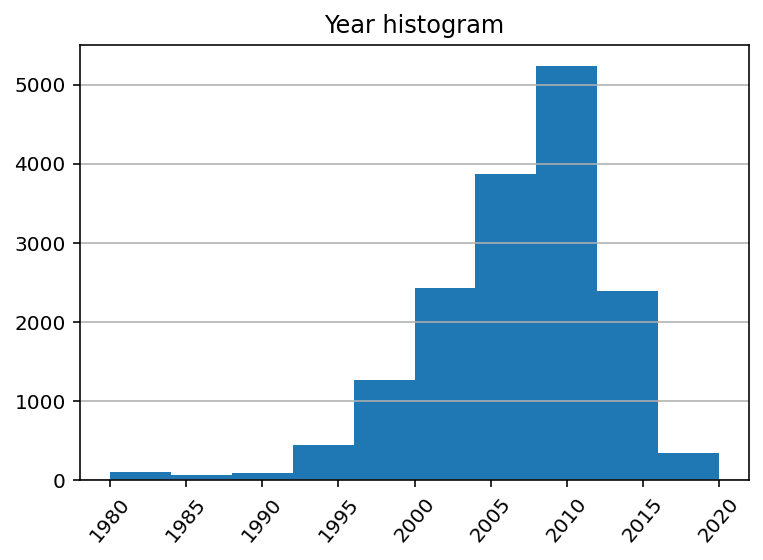

In [13]:
def year_modify(x):
  if x <= 20:
    return x + 2000
  elif x <= 100:
    return x + 1900
  else:
    return x

df['Year'] = df['Year'].apply(year_modify) # 함수 적용

plt.hist(df['Year'])
plt.title('Year histogram')
plt.grid(True,axis='y')
plt.xticks(rotation=50)
plt.show()


In [14]:
df=df.sort_values(by=['Genre'])
df['Genre']


0         Action
8923      Action
2657      Action
8922      Action
8918      Action
          ...   
2110    Strategy
8461    Strategy
910     Strategy
4663    Strategy
5685    Strategy
Name: Genre, Length: 16241, dtype: object

In [15]:
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])
df['Total_Sales']= df['NA_Sales']+ df['EU_Sales'] +df['JP_Sales'] +df['Other_Sales']

In [16]:
conditions = [
              (df['Year'] >= 1980) & (df['Year'] <1990),
              (df['Year'] >= 1990) & (df['Year'] <2000), 
              (df['Year'] >= 2000) & (df['Year'] < 2010),
              (df['Year'] >= 2010)
]

values = ['1980s','1990s','2000s','2010s']
df['Years'] = np.select(conditions,values)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Years
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000s
8923,Skylanders: SuperChargers,XOne,2015.0,Action,Activision,0.16,0.05,0.00,0.02,0.23,2010s
2657,Ghostbusters: The Video Game (DS Version),PC,2010.0,Action,Take-Two Interactive,0.00,0.08,0.00,0.02,0.10,2010s
8922,Saints Row IV,X360,2013.0,Action,Deep Silver,1.01,0.53,0.01,0.14,1.69,2010s
8918,Monkey Hero,PS,1998.0,Action,Take-Two Interactive,0.04,0.03,0.00,0.00,0.07,1990s
...,...,...,...,...,...,...,...,...,...,...,...
2110,Supreme Commander,PC,2007.0,Strategy,THQ,0.00,0.04,0.00,0.01,0.05,2000s
8461,Age of Empires Online,PC,2011.0,Strategy,Microsoft Game Studios,0.01,0.04,0.00,0.01,0.06,2010s
910,Codename: Panzers Cold War,PC,2009.0,Strategy,Atari,0.00,0.02,0.00,0.01,0.03,2000s
4663,Men of War: Vietnam,PC,2011.0,Strategy,Unknown,0.00,0.03,0.00,0.01,0.04,2010s


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


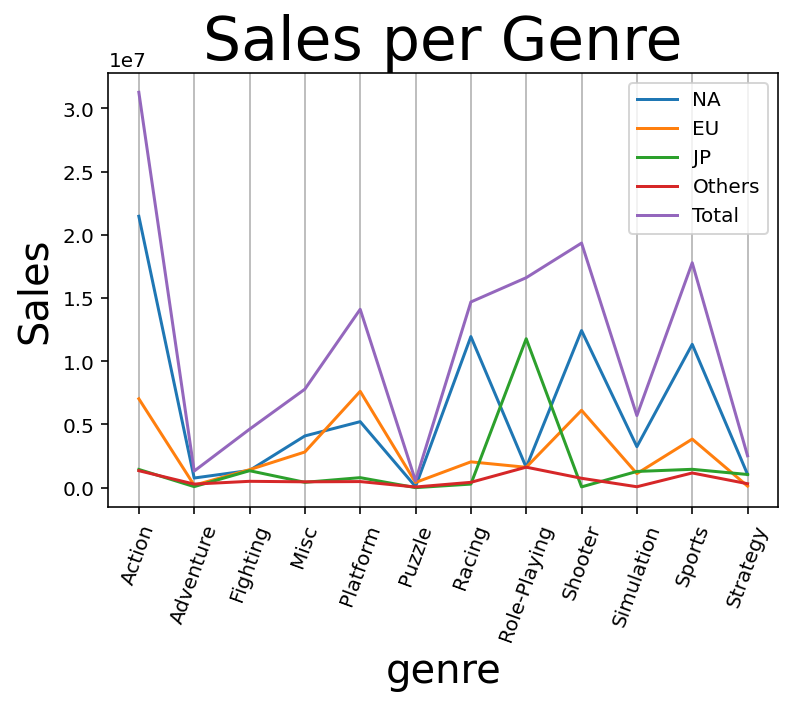

In [17]:
df_genre = df.groupby("Genre").sum()
plt.plot(df_genre['NA_Sales'],label="NA")
plt.plot(df_genre['EU_Sales'],label="EU")
plt.plot(df_genre['JP_Sales'],label="JP")
plt.plot(df_genre['Other_Sales'],label="Others")
plt.plot(df_genre['Total_Sales'],label="Total")
plt.xlabel('genre',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("Sales per Genre",fontsize=30)
plt.legend()
plt.show()


NA: 액션,슈팅,스포츠

EU:액션,플랫폼,슈팅

일본:롤플레잉

그외:큰차이없음



In [18]:
df_year=df.groupby('Years').sum()
df_year

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Years,,,,,,
1980s,404726.0,520234.68,110031.06,102.49,190006.93,820375.16
1990s,3521881.0,14550560.15,3670278.24,7300364.05,420046.81,25941249.25
2000s,18356715.0,27452366.38,16421234.60,9690496.40,3620457.86,57184555.24
2010s,10302730.0,32071071.24,14130815.34,2970288.49,3200264.34,52372439.41


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


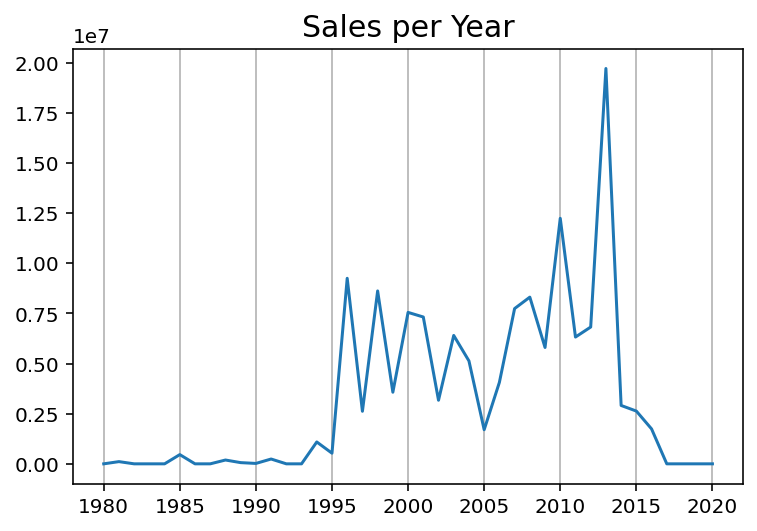

In [19]:
plt.plot(df.groupby('Year')['Total_Sales'].sum())
plt.title(str("Sales per Year"),fontsize=15)
plt.grid(axis='x')
plt.show()

In [31]:


total_years = pd.DataFrame([df[(df['Year'] >= 1980)&(df['Year'] < 1990)].groupby('Genre')['Total_Sales'].sum(),
                df[(df['Year'] >= 1990)&(df['Year'] < 2000)].groupby('Genre')['Total_Sales'].sum(),
                df[(df['Year'] >= 2000)&(df['Year'] < 2010)].groupby('Genre')['Total_Sales'].sum(),
                df[(df['Year'] >= 2010)&(df['Year'] < 2020)].groupby('Genre')['Total_Sales'].sum()],
                index = ['1980s','1990s','2000s','2010s'])
total_years=total_years.fillna(0)

print('\nchi_square statistics:',stats.chi2_contingency(total_years)[0])
print('p-value:',stats.chi2_contingency(total_years)[1])


chi_square statistics: 56988429.552467085
p-value: 0.0


In [32]:
total_years

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1980s,110050.99,4.78,7.24,8.44,650121.61,60062.69,12.10,15.25,59.77,0.51,31.78,0.00
1990s,5010134.14,240044.56,1350122.16,260063.17,3520205.35,38.94,8600140.21,4140178.63,840068.05,1560050.48,290146.18,130057.38
2000s,9670843.46,920122.67,1810229.45,6040472.49,6620369.51,420117.44,3850434.15,9460402.74,2370431.08,4110261.53,10630792.18,1280078.54
2010s,16490653.11,150060.70,1460080.07,1490227.81,3320117.41,60021.12,2240121.40,3010288.28,16140446.50,30070.77,6870317.41,1110034.54


In [33]:
df_action=df[df['Genre']=='Action']
df_adventure=df[df['Genre']=='Adventure']
df_fighting=df[df['Genre']=='Fighting']
df_Misc=df[df['Genre']=='Misc']
df_platform=df[df['Genre']=='Platform']
df_puzzle=df[df['Genre']=='Puzzle']
df_racing=df[df['Genre']=='Racing']
df_role=df[df['Genre']=='Role-Playing']
df_shooter=df[df['Genre']=='Shooter']
df_simulation=df[df['Genre']=='Simulation']
df_sports=df[df['Genre']=='Sports']
df_strategy=df[df['Genre']=='Strategy']

In [34]:
action=df_action.groupby(['Years']).count()
shooter=df_shooter.groupby(['Years']).count()
sports=df_sports.groupby(['Years']).count()





In [35]:
total_years['Action']

1980s      110050.99
1990s     5010134.14
2000s     9670843.46
2010s    16490653.11
Name: Action, dtype: float64

In [36]:
action['Name']

Years
1980s      66
1990s     161
2000s    1579
2010s    1434
Name: Name, dtype: int64

In [37]:
pure_action=total_years['Action']/action['Name']
pure_shooter=total_years['Shooter']/shooter['Name']
pure_sports=total_years['Sports']/sports['Name']

In [39]:
print(pure_action,pure_shooter,pure_sports)

1980s     1667.439242
1990s    31118.845590
2000s     6124.663369
2010s    11499.758096
dtype: float64 1980s        1.992333
1990s     6131.883577
2000s     3301.436045
2010s    40861.889873
dtype: float64 1980s        1.444545
1990s      954.428224
2000s     7571.789302
2010s    12074.371547
dtype: float64


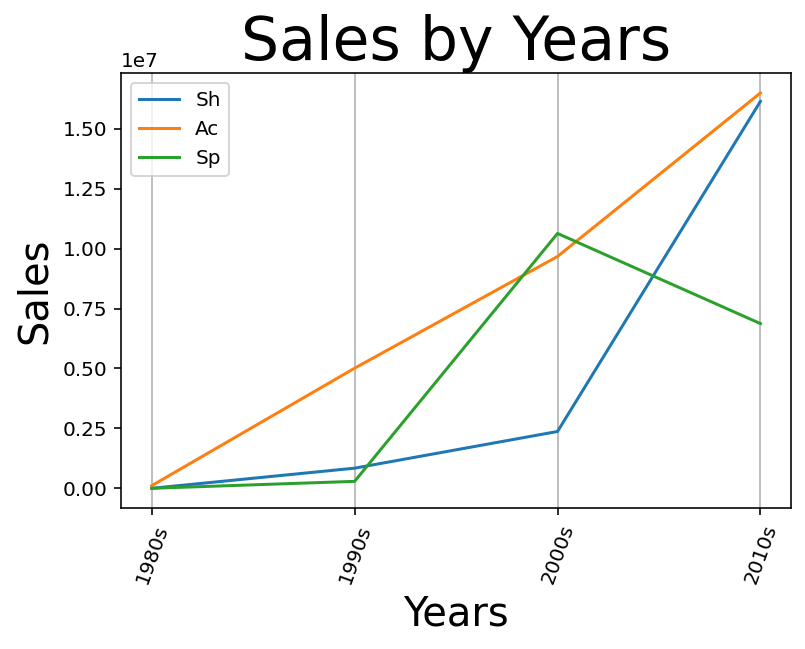

In [57]:
plt.plot(total_years['Shooter'],label="Sh")
plt.plot(total_years['Action'],label="Ac")
plt.plot(total_years['Sports'],label="Sp")
plt.xlabel('Years',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("Sales by Years",fontsize=30)
plt.legend()
plt.show()

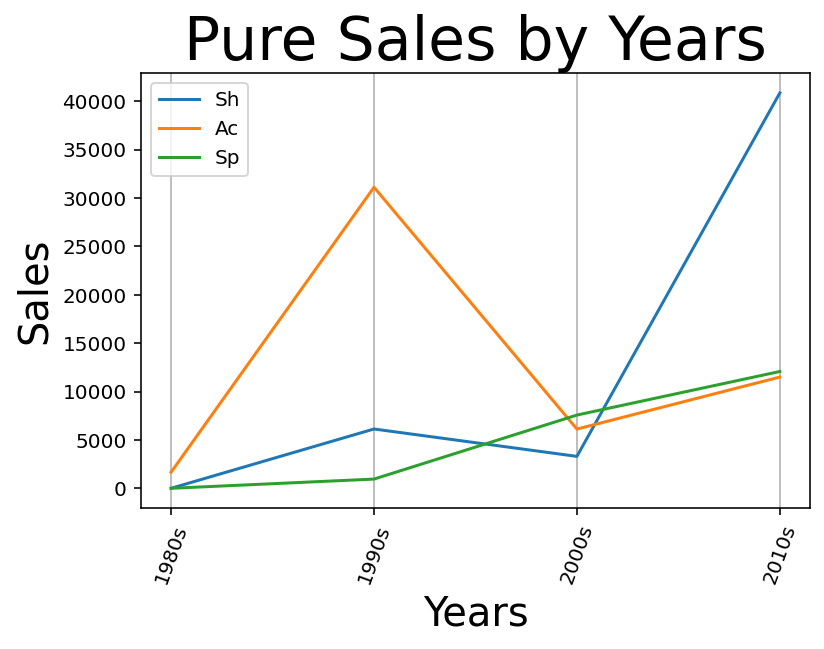

In [58]:
plt.plot(pure_shooter,label="Sh")
plt.plot(pure_action,label="Ac")
plt.plot(pure_sports,label="Sp")
plt.xlabel('Years',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("Pure Sales by Years",fontsize=30)
plt.legend()
plt.show()

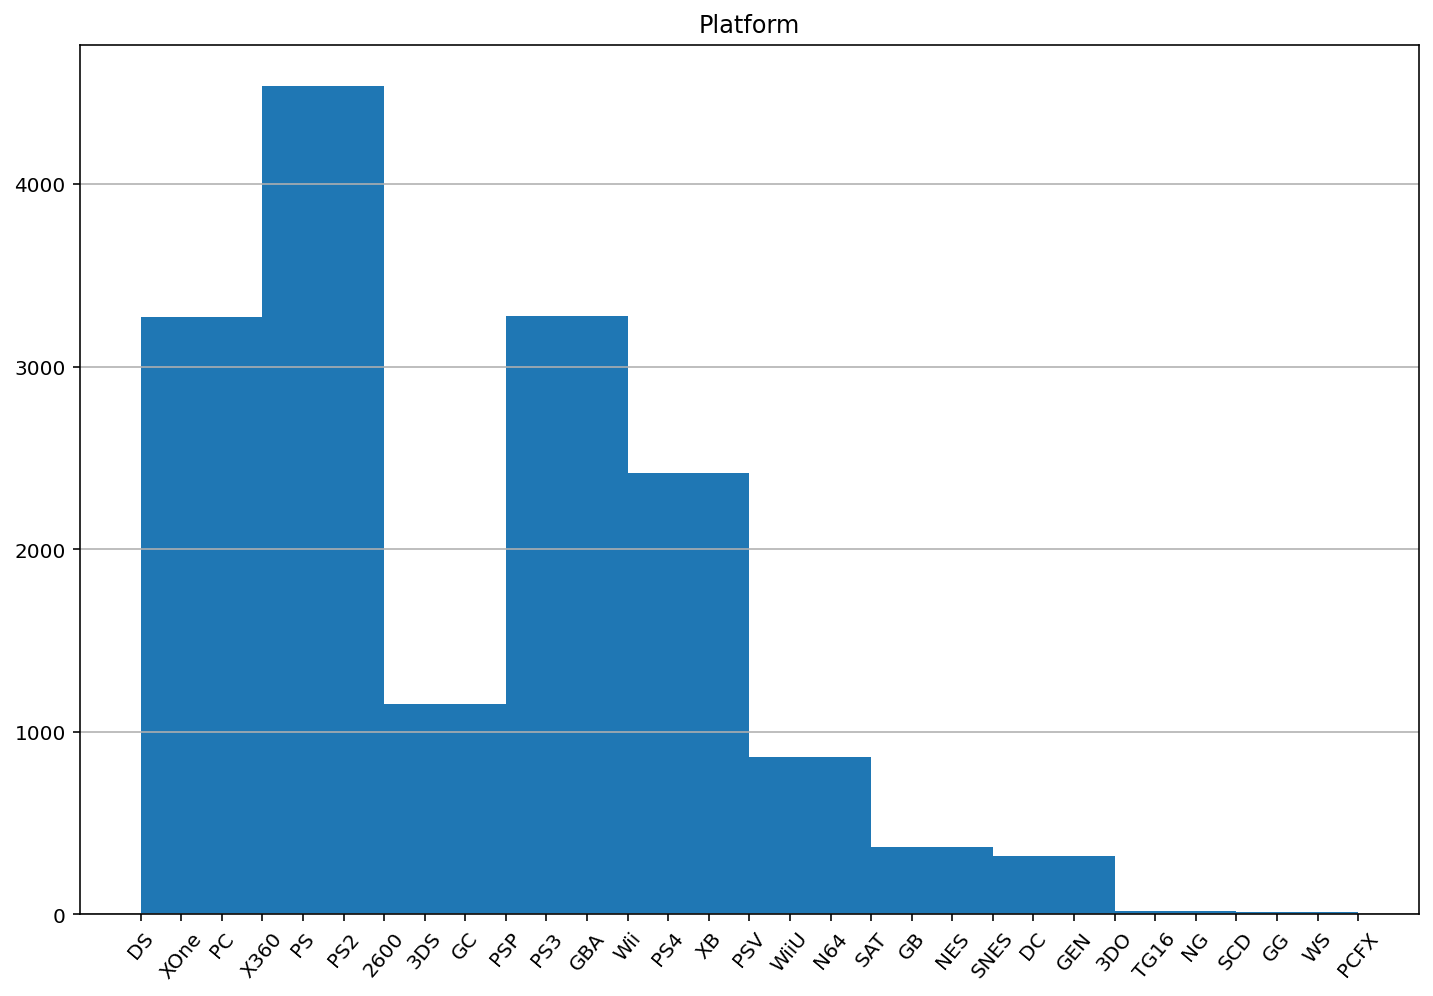

In [81]:
plt.figure(figsize=(12, 8))
plt.hist(df['Platform'])
plt.title('Platform')
plt.grid(True,axis='y')
plt.xticks(rotation=50)
plt.show()





In [71]:
df_platform=df.groupby('Platform').sum()
df_platform=df_platform.sort_values(by=['Total_Sales'],ascending=False)
df_platform

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
X360,2474164.0,22010571.77,6700271.20,80012.21,1760082.86,30550938.04
PS,2367631.0,5320328.47,2720209.03,6380132.71,440040.09,14860710.30
N64,625540.0,10250128.09,3140037.53,1060032.41,40004.24,14490202.27
PS3,2612057.0,3830384.17,6810332.90,620077.94,1430139.04,12690934.05
PS2,4251711.0,5650562.89,4760327.27,830133.27,1280186.49,12521209.92
GBA,1570493.0,4980173.28,830071.60,3150043.41,30007.48,8990295.77
Wii,2579512.0,5500489.60,1960258.82,860064.93,440078.04,8760891.39
DS,4271437.0,5170382.76,1480192.57,1250173.72,190060.05,8090809.10
PS4,675027.0,3650092.15,420122.52,50013.99,700042.30,4820270.96


In [62]:
cross_chi2 = pd.crosstab(df['Platform'],df['Total_Sales'])
print('\np-value:',stats.chi2_contingency(cross_chi2)[1])


p-value: 1.740564282658322e-98


In [76]:
df_2010=df[df['Years']=='2010s']
df_2000=df[df['Years']=='2000s']
df_platform_2010=df_2010.groupby('Platform').sum()
df_platform_2010=df_platform_2010.sort_values(by=['Total_Sales'],ascending=False)
df_platform_2000=df_2000.groupby('Platform').sum()
df_platform_2000=df_platform_2000.sort_values(by=['Total_Sales'],ascending=False)

In [79]:
df_platform_2000

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
PS2,4165274.0,5650560.98,4760325.62,830132.49,1280185.26,12521204.35
GBA,1570493.0,4980173.28,830071.60,3150043.41,30007.48,8990295.77
PS,544138.0,760064.93,2090044.83,3770016.33,80007.87,6700133.96
DS,3240093.0,4490320.60,1040162.67,320146.78,150051.52,6000681.57
PS3,833337.0,1740158.50,3090112.87,19.53,620049.20,5450340.10
Wii,1674725.0,4150366.47,890194.32,80050.45,300060.03,5420671.27
X360,1106218.0,2740258.51,1050105.71,50006.79,910036.69,4750407.70
XB,1600906.0,1180178.06,780057.59,1.38,40008.27,2000245.30
N64,138011.0,600021.21,120005.99,1060007.19,1.04,1780035.43


In [80]:
df_platform_2010

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
X360,1367946.0,19270313.26,5650165.49,30005.42,850046.17,25800530.34
PS3,1778720.0,2090225.67,3720220.03,620058.41,810089.84,7240593.95
PS4,675027.0,3650092.15,420122.52,50013.99,700042.30,4820270.96
XOne,427135.0,1880081.31,1530044.10,0.34,10011.91,3420137.66
Wii,904787.0,1350123.13,1070064.50,780014.48,140018.01,3340220.12
DS,1029359.0,680062.16,440029.90,930026.92,40008.53,2090127.51
WiiU,287944.0,1180037.14,670023.56,12.79,6.45,1850079.94
3DS,1002504.0,550072.31,470053.77,210092.75,220011.54,1450230.37
PC,915577.0,820037.15,80065.77,0.00,320015.34,1220118.26


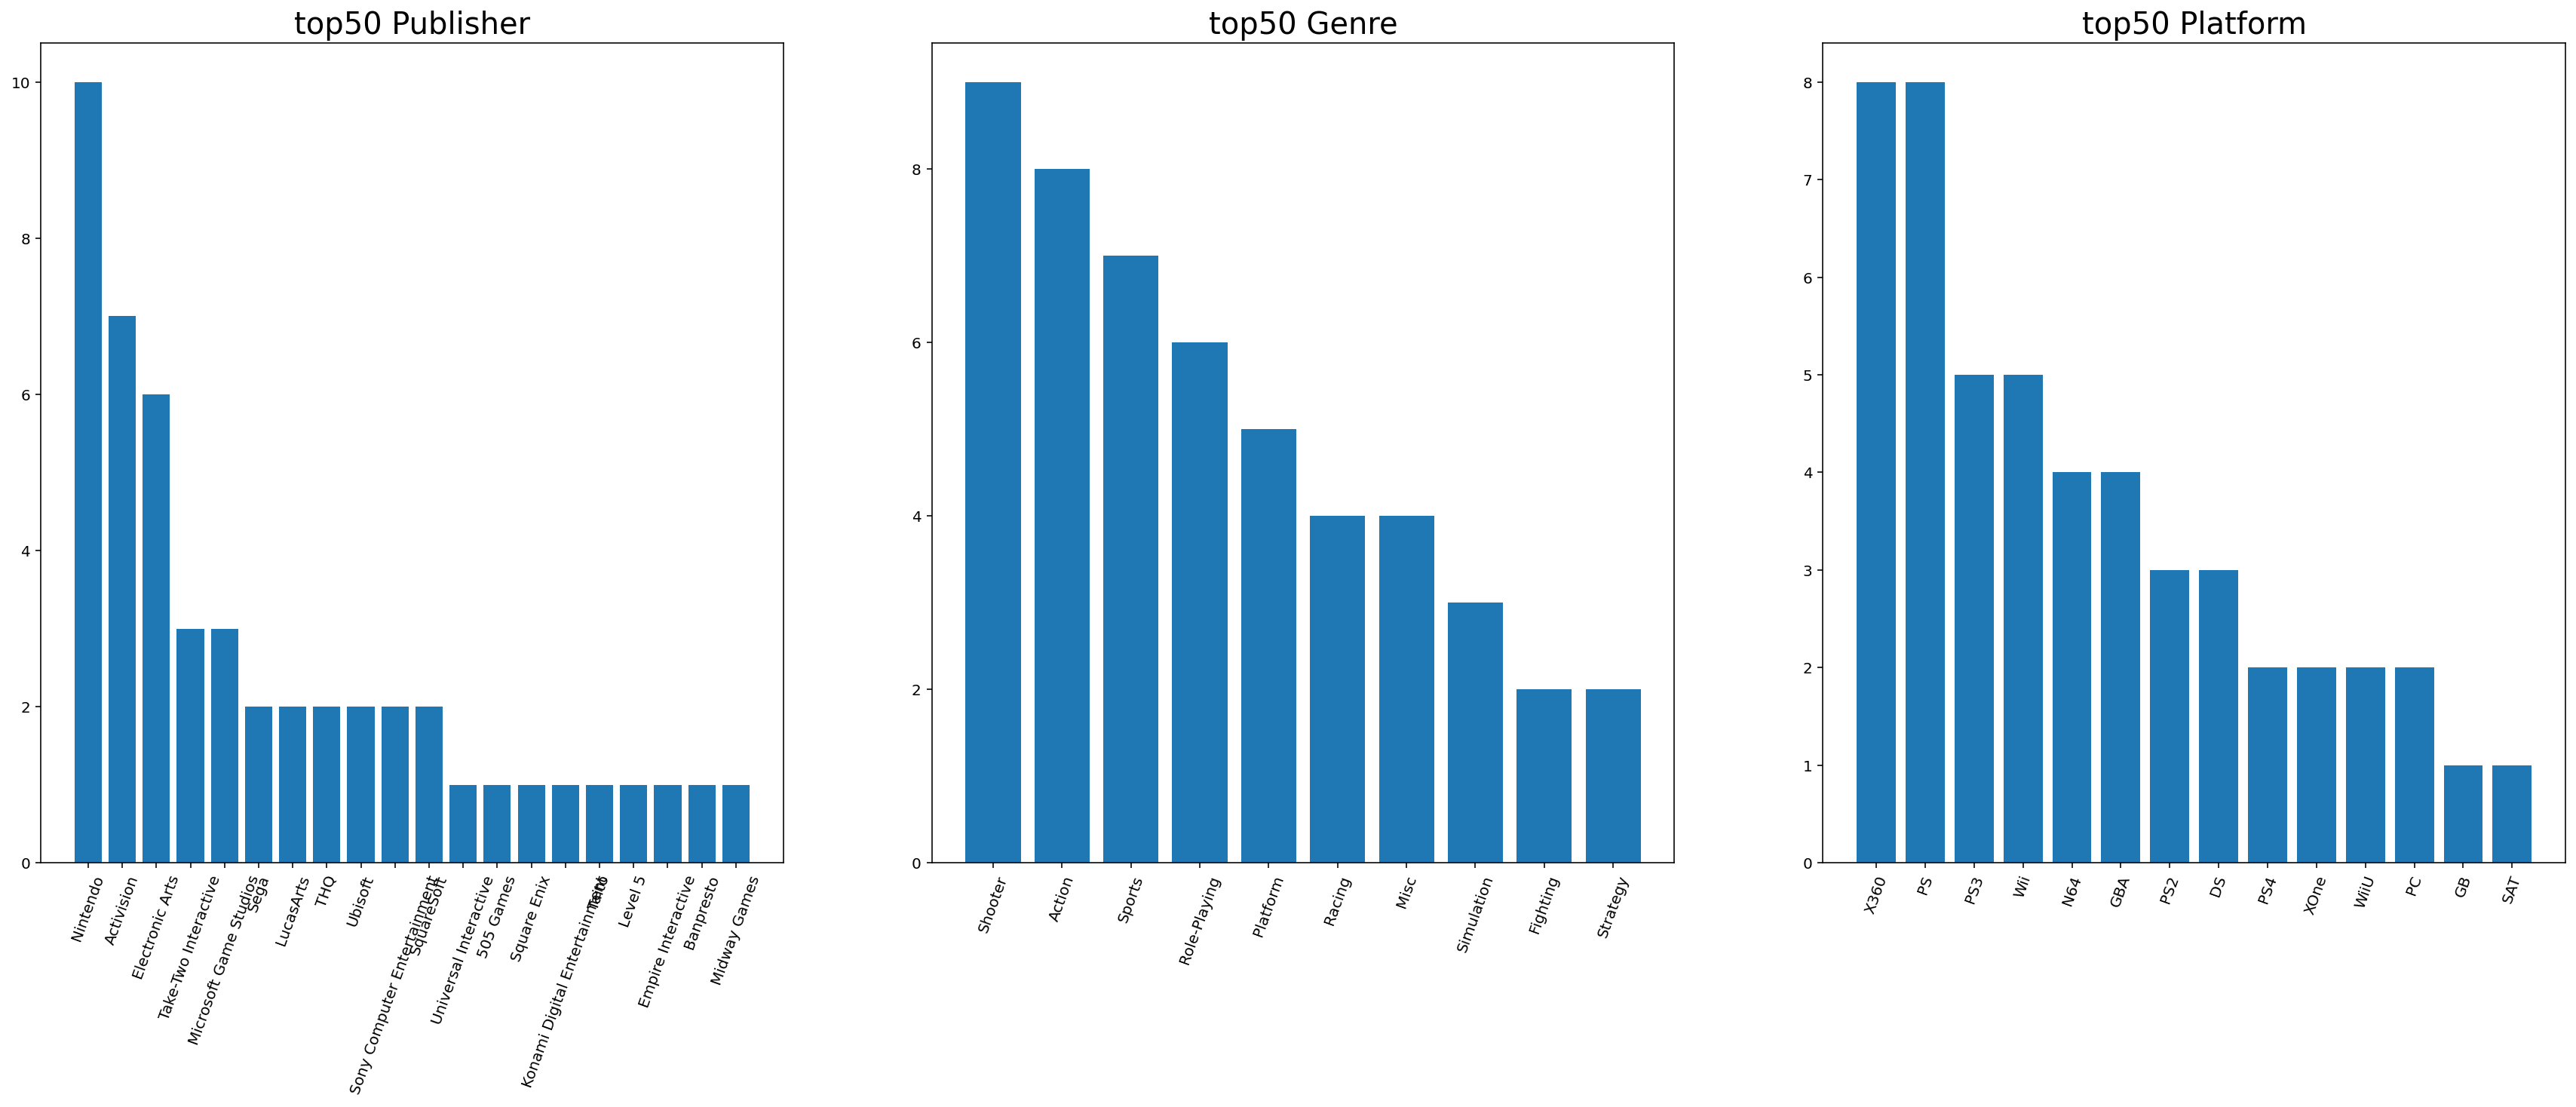

In [87]:
top_50 = df.nlargest(50,columns='Total_Sales')

fig, ax = plt.subplots(1, 3, figsize = (30,10))
ax[0].bar(top_50['Publisher'].value_counts().index,top_50['Publisher'].value_counts())
ax[0].set_title('top50 Publisher',fontsize=20)
ax[1].bar(top_50['Genre'].value_counts().index,top_50['Genre'].value_counts())
ax[1].set_title('top50 Genre',fontsize=20)
ax[2].bar(top_50['Platform'].value_counts().index,top_50['Platform'].value_counts())
ax[2].set_title('top50 Platform',fontsize=20)
for i in range(0,3):
  ax[i].xaxis.set_tick_params(rotation=70)

plt.show()

출시플랫폼:X360 & ps4 but 추가적 데이터 필요

출시장르:슈팅게임 or 액션